# Correlation analysis - FRED® time series and stockprices from EOHD

At first we gather the relevant API keys and call the classes for downloading our data

In [1]:
import os
import scipy
from datetime import datetime
from eod import EodHistoricalData
import pandas as pd
from fredapi import Fred

start = '2020-01-01'
end = '2022-12-01'

stock_symbol = 'AAPL.US'  # https://eodhistoricaldata.com/financial-summary/AAPL.US
fred_indicator = 'RSXFS'  # Advance Retail Sales: Retail Trade (RSXFS) https://fred.stlouisfed.org/series/RSXFS

eod_key = os.environ['API_EOD']
fred_key = os.environ['API_FRED']

fred = Fred(api_key=fred_key)
client = EodHistoricalData(eod_key)

After downloading the stockprices we select the "adjusted close" column for clean data (https://eodhistoricaldata.com/financial-apis/adjusted-close-and-close-whats-the-difference/). Then we add Non-business days with the previous value recorded (e.g. the closing price of friday will equal our prices set for saturday and sunday).

In [2]:
# downloading the data
eod_data = client.get_prices_eod(stock_symbol, period='d', order='a', from_=start, to=end)

# selecting the adjusted close for our values and setting the "time"-column as our index
stock = pd.DataFrame(eod_data).set_index('date')['adjusted_close']
stock.index = pd.to_datetime(stock.index)

# adding the non-business days with privious value recorded
stock = stock.resample('d').asfreq().fillna(method='ffill')

Then we download the data from FRED® (https://fred.stlouisfed.org) and add like before days which were not recorded with the corresponding previous recorded value.

In [3]:
fred_data = fred.get_series(fred_indicator)[start : end]
indicator = fred_data.resample('1d').asfreq().fillna(method='ffill')

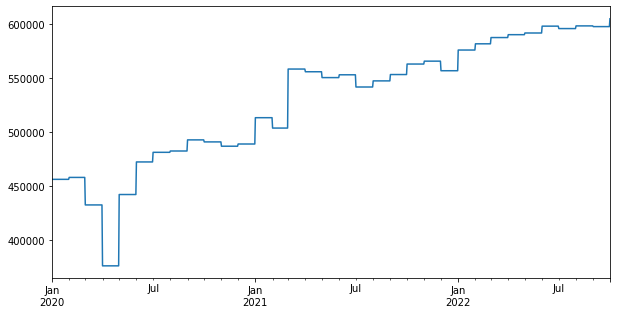

In [4]:
indicator.plot(figsize=(10, 5));

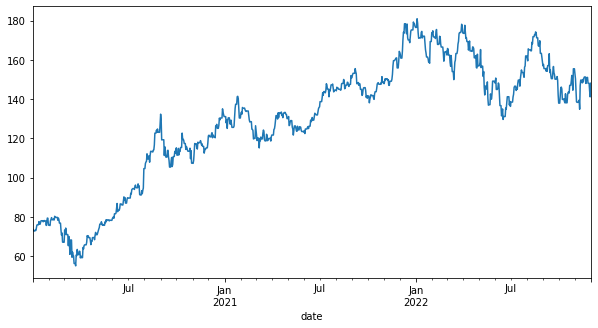

In [5]:
stock.plot(figsize=(10, 5));

In order to calculate the pearson correlation coefficient both series must have the same lenght:

In [6]:
last_value = min(stock.index.max(), indicator.index.max())
first_falue = max(stock.index.min(), indicator.index.min())

stock = stock[first_falue : last_value]
indicator = indicator[first_falue : last_value]

In the last step we calculate and print the person correlation coefficient value with its corresponding pvalue

In [7]:
print(scipy.stats.pearsonr(stock.values, indicator.values))

PearsonRResult(statistic=0.8945473969180565, pvalue=0.0)
